In [15]:
import pandas as pd
import numpy as np

train_data_no_build_time = pd.read_csv('test_june_july.csv')

In [16]:
build_times = pd.read_csv('target_(build_duration)_june_july.csv')

In [3]:
train_data_no_build_time.head()

,Unnamed: 0,date_mday,date_month,build_scope,id,viewname,modified_datetime,date_wday,date_hour,in_queue,...,path_second_dir_index,path_third_dir_index,path_fourth_dir_index,path_fifth_dir_index,path_sixth_dir_index,building_block_count,component_count,build_exit_code,building_block,component
0,1,1,june,e7048511692cff4f62cfe90835fc1abd86b07e99339c38...,28394922,63c6cfa574e13b8dccd06fb8c3995234c8f31eb4821963...,2018-06-01 00:01:44.0,friday,0,0,...,NaN,NaN,NaN,NaN,NaN,1,2,1,e7048511692cff4f62cfe90835fc1abd86b07e99339c38...,91f026c996feb33556b5d418d17e015945f305c96666b6...
1,2,1,june,f2e0e91589143e8427328edab05e6ab9aede832ddac8d5...,28394923,22de7569f896a42cb2f2836f3ba05f689a4d867394ae2c...,2018-06-01 00:01:49.0,friday,0,0,...,16.0,19.0,NaN,NaN,NaN,1,3,0,f2e0e91589143e8427328edab05e6ab9aede832ddac8d5...,a545aebf29aa6fc81eb8d8906de5a808bc17f10bc55a25...
2,3,1,june,3e1a610ac6fd15c8f3d6eaad07b3eabd8371eb14c8b9ff...,28394926,4a195cf70d29ad8066cae3457b931198caf2581992971b...,2018-06-01 00:05:33.0,friday,0,0,...,77.0,73.0,NaN,NaN,NaN,7,8,0,3e1a610ac6fd15c8f3d6eaad07b3eabd8371eb14c8b9ff...,0049aa51a630b7912728071542a064ffa7d385e0d14429...
3,4,1,june,f2e0e91589143e8427328edab05e6ab9aede832ddac8d5...,28394928,22de7569f896a42cb2f2836f3ba05f689a4d867394ae2c...,2018-06-01 00:06:15.0,friday,0,0,...,16.0,19.0,NaN,NaN,NaN,1,3,1,f2e0e91589143e8427328edab05e6ab9aede832ddac8d5...,a545aebf29aa6fc81eb8d8906de5a808bc17f10bc55a25...
4,5,1,june,6a0ab58a939779971144a9e3b015de5333ac6af857b46b...,28394932,bbf5b1e5c34f9dcebc6bf81aac3a39b8880011542b4170...,2018-06-01 00:07:04.0,friday,0,0,...,19.0,11.0,2.0,3.0,3.0,1,1,0,6a0ab58a939779971144a9e3b015de5333ac6af857b46b...,c8f48a68649d1cae147fb8afd54801e3e82622465c98ff...


In [41]:
X = train_data_no_build_time
Y = build_times.build_duration

In [84]:
import numpy as np
Y = np.log(build_times.build_duration.as_matrix() + .1)

In [85]:
X.columns
print(len(Y))

X.dtypes

203510


Unnamed: 0                 int64
date_mday                  int64
date_month                object
build_scope               object
id                         int64
viewname                  object
modified_datetime         object
date_wday                 object
date_hour                  int64
in_queue                   int64
user_index                 int64
view_user_build_count      int64
project_index              int64
department_index           int64
path                      object
path_first_dir_index       int64
path_second_dir_index    float64
path_third_dir_index     float64
path_fourth_dir_index    float64
path_fifth_dir_index     float64
path_sixth_dir_index     float64
building_block_count       int64
component_count            int64
build_exit_code            int64
building_block            object
component                 object
dtype: object

In [86]:
from sklearn.preprocessing import Imputer

numeric_values = X.select_dtypes(exclude=['object'])
numeric_values.head()


,Unnamed: 0,date_mday,id,date_hour,in_queue,user_index,view_user_build_count,project_index,department_index,path_first_dir_index,path_second_dir_index,path_third_dir_index,path_fourth_dir_index,path_fifth_dir_index,path_sixth_dir_index,building_block_count,component_count,build_exit_code
0,1,1,28394922,0,0,159,90,235,3,1,NaN,NaN,NaN,NaN,NaN,1,2,1
1,2,1,28394923,0,0,128,45,25,20,18,16.0,19.0,NaN,NaN,NaN,1,3,0
2,3,1,28394926,0,0,210,101,108,1,75,77.0,73.0,NaN,NaN,NaN,7,8,0
3,4,1,28394928,0,0,128,46,25,20,18,16.0,19.0,NaN,NaN,NaN,1,3,1
4,5,1,28394932,0,0,16,249,15,33,21,19.0,11.0,2.0,3.0,3.0,1,1,0


In [87]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
imputed_numeric_values = my_imputer.fit_transform(numeric_values)

imputed_numeric_values = pd.DataFrame(data=imputed_numeric_values, columns=numeric_values.columns)
imputed_numeric_values.head()

,Unnamed: 0,date_mday,id,date_hour,in_queue,user_index,view_user_build_count,project_index,department_index,path_first_dir_index,path_second_dir_index,path_third_dir_index,path_fourth_dir_index,path_fifth_dir_index,path_sixth_dir_index,building_block_count,component_count,build_exit_code
0,1.0,1.0,28394922.0,0.0,0.0,159.0,90.0,235.0,3.0,1.0,47.100991,89.889714,4.518165,2.19538,2.752714,1.0,2.0,1.0
1,2.0,1.0,28394923.0,0.0,0.0,128.0,45.0,25.0,20.0,18.0,16.000000,19.000000,4.518165,2.19538,2.752714,1.0,3.0,0.0
2,3.0,1.0,28394926.0,0.0,0.0,210.0,101.0,108.0,1.0,75.0,77.000000,73.000000,4.518165,2.19538,2.752714,7.0,8.0,0.0
3,4.0,1.0,28394928.0,0.0,0.0,128.0,46.0,25.0,20.0,18.0,16.000000,19.000000,4.518165,2.19538,2.752714,1.0,3.0,1.0
4,5.0,1.0,28394932.0,0.0,0.0,16.0,249.0,15.0,33.0,21.0,19.000000,11.000000,2.000000,3.00000,3.000000,1.0,1.0,0.0


In [ ]:
# TODOs:
# - remove exit codes != 0
# - generate dummies
# - 

In [88]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

model = XGBRegressor(n_estimators=50)
my_pipeline = make_pipeline(my_imputer, model)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, imputed_numeric_values, Y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


[-0.61388693 -0.64165391 -0.59945378]
Mean Absolute Error 0.618332


In [89]:
my_pipeline.fit(imputed_numeric_values, Y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [90]:
test = pd.read_csv('test_august.csv')

In [91]:
numeric_values_test = test.select_dtypes(exclude=['object'])
test_transform = my_imputer.transform(numeric_values_test)


In [92]:
duration_predictions = my_pipeline.predict(test_transform)

In [93]:
Y.mean()

3.4479721975898863

In [94]:
import numpy as np
np.mean(duration_predictions)

3.478897

In [95]:
duration_predictions_exp = np.exp(duration_predictions - .1)

In [96]:
my_submission = pd.DataFrame({'id': test.id, 'build_duration': duration_predictions_exp})

my_submission.to_csv('predictions.csv', sep=';', columns=['id', 'build_duration'], index=False)


In [110]:
model.feature_importances_


array([0.01449275, 0.00869565, 0.        , 0.04637681, 0.        ,
       0.12173913, 0.06376812, 0.02028986, 0.04927536, 0.13623188,
       0.06376812, 0.02898551, 0.07826087, 0.01449275, 0.12173913,
       0.02318841, 0.11884058, 0.08985507], dtype=float32)

In [112]:
X.columns

Index(['Unnamed: 0', 'date_mday', 'date_month', 'build_scope', 'id',
       'viewname', 'modified_datetime', 'date_wday', 'date_hour', 'in_queue',
       'user_index', 'view_user_build_count', 'project_index',
       'department_index', 'path', 'path_first_dir_index',
       'path_second_dir_index', 'path_third_dir_index',
       'path_fourth_dir_index', 'path_fifth_dir_index', 'path_sixth_dir_index',
       'building_block_count', 'component_count', 'build_exit_code',
       'building_block', 'component'],
      dtype='object')

In [113]:
from matplotlib import pyplot

<BarContainer object of 18 artists>

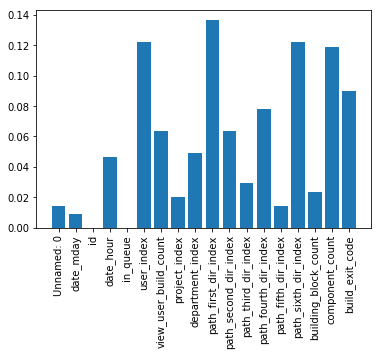

In [142]:
pyplot.xticks(rotation=90)
pyplot.bar(imputed_numeric_values.columns, model.feature_importances_)
